# ***Libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# ***Dataset***

In [2]:
# 0 --> spam , 1 --> ham
df = pd.read_csv("combined_data.csv")
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [3]:
# Make copy of dataframe
data = df.copy()
data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


# ***Basic EDA***

In [ ]:
# shape of the datasets
print(f"The Shape of the Dataset is: ",{data.shape})

The Shape of the Dataset is:  {(83448, 2)}


In [ ]:
# datasets basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
# stats data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,83448.0,0.526196,0.499316,0.0,0.0,1.0,1.0,1.0


In [ ]:
# checking missing values
data.isnull().sum()

,0
label,0
text,0


In [ ]:
# checking duplicated
data.duplicated().sum()

np.int64(0)

In [ ]:
data['label'].value_counts()

,count
label,
1,43910
0,39538


# ***Preprocessing***

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

def transform_text(text):
    # 1. Lowercase + tokenize
    tokens = nltk.word_tokenize(text.lower())

    # 2. Keep only alphanumeric
    tokens = [t for t in tokens if t.isalnum()]

    # 3. Remove stopwords and punctuation
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]

    # 4. Apply stemming
    tokens = [ps.stem(t) for t in tokens]

    return " ".join(tokens)


# Example
print(transform_text("HOW % & ARE YOU MOIZ? DID YOU LIKE MY PRESENTATION ON ML? I LOVED THE YT LECTURE ON MACHINE LEARNING"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


moiz like present ml love yt lectur machin learn


In [5]:
# NOW TRANFORMED THE TEXT AND APPENDS TO THE DATASETS
data["Transformed_Text"] = data["text"].apply(transform_text)
data.head()

,label,text,Transformed_Text
0,1,ounce feather bowl hummingbird opec moment ala...,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get your medircations online qnb ikud v...,wulvob get medirc onlin qnb ikud viagra escape...
2,0,computer connection from cnn com wednesday es...,comput connect cnn com wednesday escapenumb ma...
3,1,university degree obtain a prosperous future m...,univers degre obtain prosper futur money earn ...
4,0,thanks for all your answers guys i know i shou...,thank answer guy know check rsync manual would...


In [6]:
data = data.drop(columns=["text"])
data.head()

,label,Transformed_Text
0,1,ounc feather bowl hummingbird opec moment alab...
1,1,wulvob get medirc onlin qnb ikud viagra escape...
2,0,comput connect cnn com wednesday escapenumb ma...
3,1,univers degre obtain prosper futur money earn ...
4,0,thank answer guy know check rsync manual would...


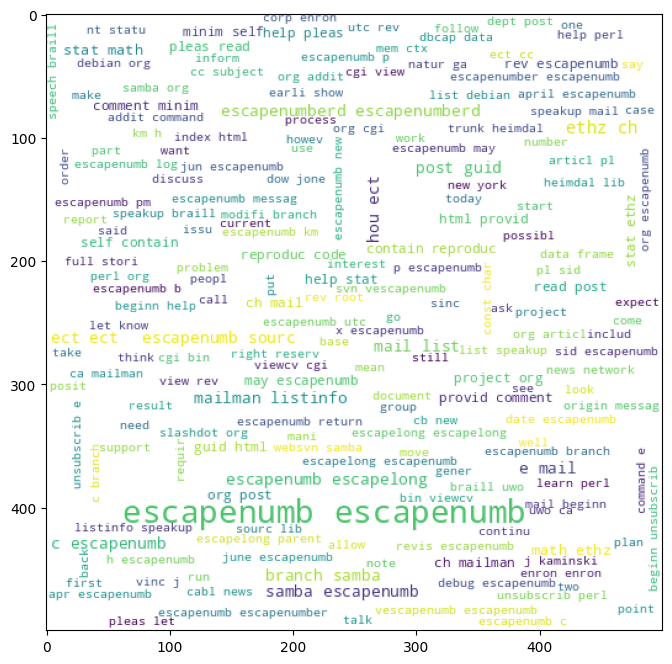

In [ ]:
# NOW WE WANT TO SEE THE TOP WORDS USED IN SPAM MESSAGE (MOST USED)
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")
spam_wc = wc.generate(data[data["label"]==0]["Transformed_Text"].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

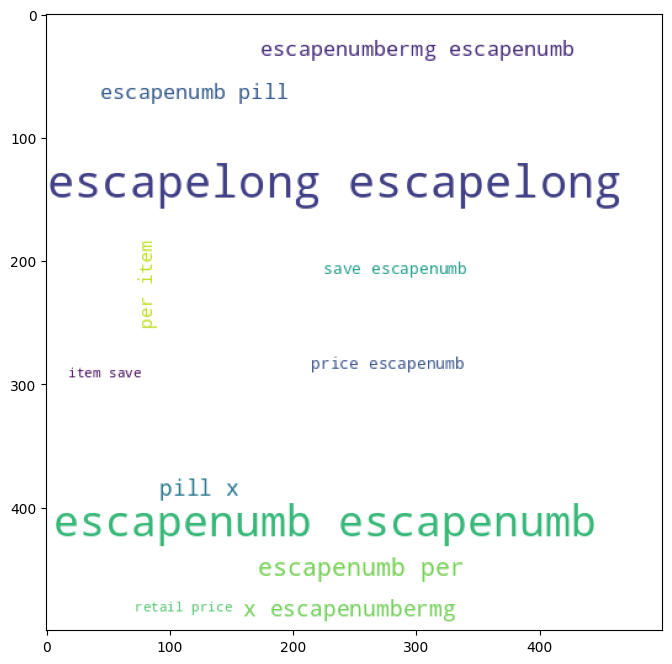

In [ ]:
# NOW WE WANT TO SEE THE TOP WORDS USED IN HAM MESSAGE (MOST USED)
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")
ham_wc = wc.generate(data[data["label"]==1]["Transformed_Text"].str.cat(sep=" "))
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

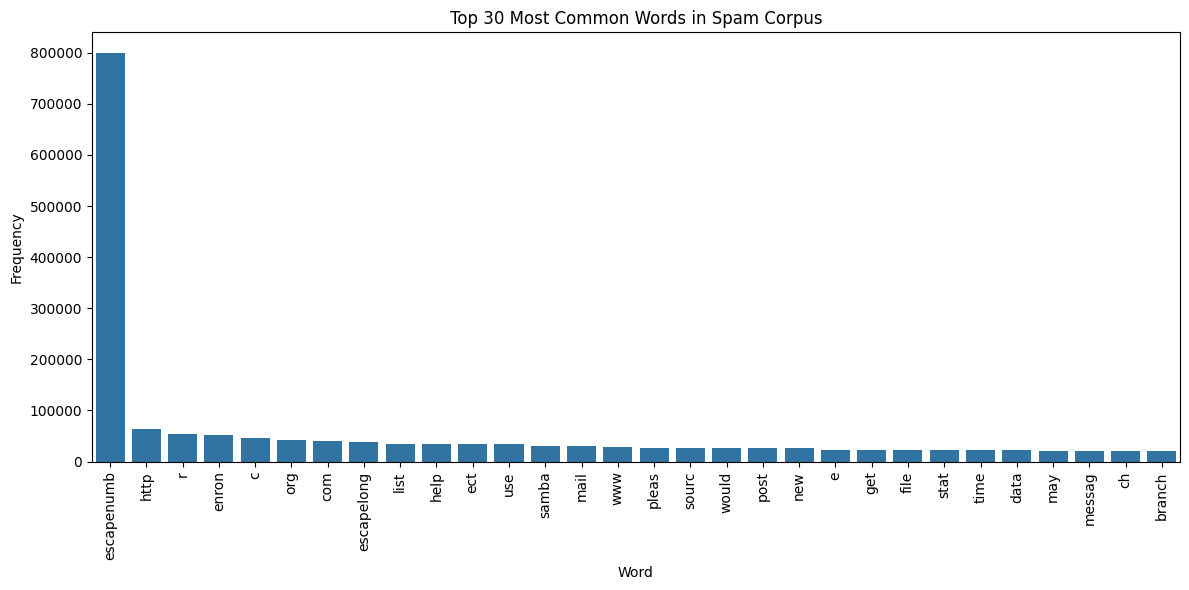

In [ ]:
spam_corpus = [] # COLLECT ALL THE WORDS OF SPAM TEXT
for message in data[data["label"]==0]["Transformed_Text"].tolist():
    for words in message.split():
        spam_corpus.append(words)

from collections import Counter
# Assuming spam_corpus is a list of words
common_words = Counter(spam_corpus).most_common(30)
data_common = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=data_common)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.tight_layout()
plt.show()

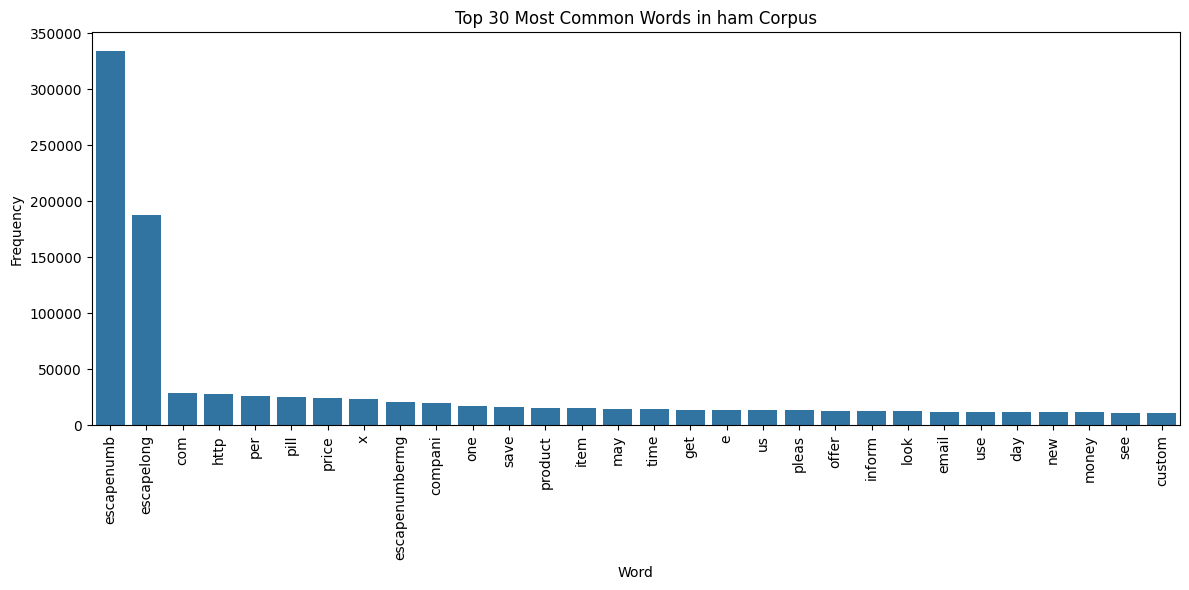

In [ ]:
spam_corpus = [] # COLLECT ALL THE WORDS OF HAM TEXT
for message in data[data["label"]==1]["Transformed_Text"].tolist():
    for words in message.split():
        spam_corpus.append(words)

from collections import Counter
# Assuming spam_corpus is a list of words
common_words = Counter(spam_corpus).most_common(30)
data_common = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=data_common)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Words in ham Corpus")
plt.tight_layout()
plt.show()

In [7]:
X = data['Transformed_Text']
y = data['label']

In [8]:
# Suppose X is your list/array of text reviews
lengths = [len(x.split()) for x in X]   # count words in each review

print("📌 Max length in dataset:", max(lengths))
print("📌 Avg length:", np.mean(lengths))
print("📌 90th percentile:", np.percentile(lengths, 90))
print("📌 95th percentile:", np.percentile(lengths, 95))

📌 Max length in dataset: 98620
📌 Avg length: 174.77044386923592
📌 90th percentile: 359.0
📌 95th percentile: 515.0


In [ ]:
# 2. Tokenization
max_words = 10000   # max vocabulary size
max_len = 400        # max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X)

# Convert texts → integer sequences
sequences = tokenizer.texts_to_sequences(X)

# 3. Padding
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

print("Example cleaned text:", X .iloc[2])
print("Example sequence:", sequences[2])
print("Example padded:", padded[2])

# ***Data Spliting***

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, y, test_size=0.2, random_state=42)

##***Model Making Simple RNN***

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks = EarlyStopping(monitor='val_accuracy',patience=3)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

# Embedding layer: Converts tokens into dense vectors.
# SimpleRNN layer: Core RNN unit.
# Dense layer: Outputs a value between 0 and 1 for binary classification.

model = Sequential([
    Embedding(input_dim=max_words, output_dim=50, input_length=max_len),
    SimpleRNN(10, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2,callbacks=callbacks)

# Evaluate on Test Data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.5388 - loss: 0.6909 - val_accuracy: 0.5681 - val_loss: 0.6772
Epoch 2/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5642 - loss: 0.6699 - val_accuracy: 0.5769 - val_loss: 0.6671
Epoch 3/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5709 - loss: 0.6548 - val_accuracy: 0.4908 - val_loss: 0.6670
Epoch 4/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5667 - loss: 0.6486 - val_accuracy: 0.5743 - val_loss: 0.6600
Epoch 5/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.5744 - loss: 0.6422 - val_accuracy: 0.5750 - val_loss: 0.6588
522/522 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5667 - loss: 0.6636
Test Accuracy: 0.5636309385299683


# ***Model Making LSTM***

In [ ]:
# Build the LSTM Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=50, input_length=max_len),
    tf.keras.layers.LSTM(16),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the Model
history = model.fit(
    X_train, y_train,  # X_train = train_pad
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks
)


# Evaluate Performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_acc)

Epoch 1/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.5682 - loss: 0.6698 - val_accuracy: 0.7517 - val_loss: 0.4815
Epoch 2/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.6796 - loss: 0.5489 - val_accuracy: 0.4977 - val_loss: 0.7082
Epoch 3/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.5522 - loss: 0.6431 - val_accuracy: 0.5829 - val_loss: 0.6101
Epoch 4/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6130 - loss: 0.5712 - val_accuracy: 0.6738 - val_loss: 0.5369
522/522 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6673 - loss: 0.5432
Test Accuracy: 0.6756740808486938


# ***Model Making GRU***

In [ ]:
 # Build the GRU Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=50, input_length=max_len),
    tf.keras.layers.GRU(16),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
history = model.fit(
    X_train, y_train,   # X_train should be the padded sequences
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy (GRU):", test_acc)


Epoch 1/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.5576 - loss: 0.6796 - val_accuracy: 0.5788 - val_loss: 0.6533
Epoch 2/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8018 - loss: 0.3845 - val_accuracy: 0.9799 - val_loss: 0.0657
Epoch 3/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9878 - loss: 0.0414 - val_accuracy: 0.9820 - val_loss: 0.0577
Epoch 4/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9945 - loss: 0.0196 - val_accuracy: 0.9828 - val_loss: 0.0600
Epoch 5/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9967 - loss: 0.0130 - val_accuracy: 0.9855 - val_loss: 0.0498
Epoch 6/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9977 - loss: 0.0078 - val_accuracy: 0.9855 - val_loss: 0.0526
Epoch 7/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.9858 - val_loss: 0.0590
Epoch 8/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9992 - loss: 0.0032 - va

# ***Keras Tuner***

In [ ]:
!pip install keras-tuner

In [12]:
import keras_tuner as kt

RNN

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf

max_words = 10000   # adjust based on your tokenizer
max_len = 400        # sequence length

def build_rnn_model(hp):
    model = Sequential()

    # Embedding Layer
    model.add(Embedding(
        input_dim=max_words,
        output_dim=hp.Choice("embedding_dim", [32, 64, 128]),
        input_length=max_len
    ))

    # Number of recurrent layers
    for i in range(hp.Int("num_layers", min_value=1, max_value=3)):
        units = hp.Int(f"units_{i}", min_value=16, max_value=128, step=16)
        activation = hp.Choice(f"activation_{i}", values=["tanh", "relu"])

        model.add(SimpleRNN(
            units=units,
            activation=activation,
            return_sequences=(i < hp.get("num_layers") - 1),  # keep sequences for stacked RNNs
            kernel_regularizer=regularizers.l2(
                hp.Float("l2_reg", 1e-6, 1e-3, sampling="log")
            )
        ))

        # BatchNorm (optional)
        if hp.Boolean(f"batch_norm_{i}"):
            model.add(BatchNormalization())

        # Dropout
        model.add(Dropout(hp.Float(f"dropout_{i}", min_value=0.0, max_value=0.5, step=0.1)))

    # Output Layer (binary classification)
    model.add(Dense(1, activation="sigmoid"))

    # Optimizer + Learning Rate
    optimizer = hp.Choice("optimizer", ["adam", "nadam", "rmsprop", "sgd"])
    lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")

    if optimizer == "adam":
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "nadam":
        opt = tf.keras.optimizers.Nadam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)

    model.compile(
        optimizer=opt,
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )

    return model

tuner = kt.RandomSearch(build_rnn_model, objective="val_accuracy", max_trials=5, directory="mydir_1", project_name="all_in_one_1")

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

tuner.get_best_hyperparameters()[0].values

model_rnn = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 33m 39s]
val_accuracy: 0.47561413049697876

Best val_accuracy So Far: 0.6503295302391052
Total elapsed time: 01h 33m 39s


In [ ]:
history = model_rnn.fit(
    X_train, y_train,
    epochs=20,          # longer training now
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
    ]
)

Epoch 1/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.6136 - loss: 0.6553 - val_accuracy: 0.5714 - val_loss: 0.6787
Epoch 2/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5801 - loss: 0.6619 - val_accuracy: 0.5742 - val_loss: 0.7416
Epoch 3/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.5741 - loss: 0.6558 - val_accuracy: 0.5781 - val_loss: 0.6914
Epoch 4/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.5780 - loss: 0.6448 - val_accuracy: 0.4871 - val_loss: 0.7380
Epoch 5/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5795 - loss: 0.6434 - val_accuracy: 0.6137 - val_loss: 0.6539
Epoch 6/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.6072 - loss: 0.6324 - val_accuracy: 0.5757 - val_loss: 0.6856
Epoch 7/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 21s 35ms/step - accuracy: 0.5881 - loss: 0.6397 - val_accuracy: 0.4933 - val_loss: 0.9541
Epoch 8/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.6169 - loss: 0.5968 - 

In [ ]:
test_loss, test_acc = model_rnn.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

522/522 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6052 - loss: 0.6637
Test Accuracy: 0.6136608719825745


In [ ]:
# Save rnn model
model_rnn.save('rnn_model.keras')

LSTM

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf

max_words = 10000   # adjust based on your tokenizer
max_len = 400        # sequence length

def build_lstm_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=max_words,
        output_dim=hp.Choice("embedding_dim", [32, 64, 128]),
        input_length=max_len
    ))

    for i in range(hp.Int("num_layers", 1, 3)):
        units = hp.Int(f"units_{i}", 16, 128, step=16)
        model.add(LSTM(
            units=units,
            return_sequences=(i < hp.get("num_layers") - 1),
            kernel_regularizer=regularizers.l2(hp.Float("l2_reg", 1e-6, 1e-3, sampling="log"))
        ))

        if hp.Boolean(f"batch_norm_{i}"):
            model.add(BatchNormalization())

        model.add(Dropout(hp.Float(f"dropout_{i}", 0.0, 0.5, step=0.1)))

    model.add(Dense(1, activation="sigmoid"))

    optimizer = hp.Choice("optimizer", ["adam", "nadam", "rmsprop", "sgd"])
    lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")

    if optimizer == "adam":
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "nadam":
        opt = tf.keras.optimizers.Nadam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

tuner = kt.RandomSearch(build_lstm_model, objective="val_accuracy", max_trials=5, directory="mydir_2", project_name="all_in_one_2")

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

tuner.get_best_hyperparameters()[0].values

model_lstm = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 06m 47s]
val_accuracy: 0.9875374436378479

Best val_accuracy So Far: 0.989215075969696
Total elapsed time: 00h 53m 21s


In [ ]:
history = model_lstm.fit(
    X_train, y_train,
    epochs=20,          # longer training now
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
    ]
)

Epoch 1/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9974 - loss: 0.0127 - val_accuracy: 0.9961 - val_loss: 0.0174
Epoch 2/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9977 - loss: 0.0101 - val_accuracy: 0.9957 - val_loss: 0.0196
Epoch 3/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9988 - loss: 0.0057 - val_accuracy: 0.9948 - val_loss: 0.0226
Epoch 4/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9991 - loss: 0.0050 - val_accuracy: 0.9951 - val_loss: 0.0242


In [ ]:
test_loss, test_acc = model_lstm.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

522/522 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9889 - loss: 0.0483
Test Accuracy: 0.9887956976890564


In [ ]:
# Save rnn model
model_lstm.save("lstm_model.keras")

GRU

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow as tf

max_words = 10000   # adjust based on your tokenizer
max_len = 400        # sequence length

def build_gru_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=max_words,
        output_dim=hp.Choice("embedding_dim", [32, 64, 128]),
        input_length=max_len
    ))

    for i in range(hp.Int("num_layers", 1, 3)):
        units = hp.Int(f"units_{i}", 16, 128, step=16)
        model.add(GRU(
            units=units,
            return_sequences=(i < hp.get("num_layers") - 1),
            kernel_regularizer=regularizers.l2(hp.Float("l2_reg", 1e-6, 1e-3, sampling="log"))
        ))

        if hp.Boolean(f"batch_norm_{i}"):
            model.add(BatchNormalization())

        model.add(Dropout(hp.Float(f"dropout_{i}", 0.0, 0.5, step=0.1)))

    model.add(Dense(1, activation="sigmoid"))

    optimizer = hp.Choice("optimizer", ["adam", "nadam", "rmsprop", "sgd"])
    lr = hp.Float("learning_rate", 1e-4, 1e-2, sampling="log")

    if optimizer == "adam":
        opt = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer == "nadam":
        opt = tf.keras.optimizers.Nadam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = tf.keras.optimizers.RMSprop(learning_rate=lr)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9)

    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

tuner = kt.RandomSearch(build_gru_model, objective="val_accuracy", max_trials=5, directory="mydir_3", project_name="all_in_one_3")

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

tuner.get_best_hyperparameters()[0].values

model_gru = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 12m 28s]
val_accuracy: 0.5750150084495544

Best val_accuracy So Far: 0.9884361624717712
Total elapsed time: 01h 05m 47s


In [14]:
history = model_gru.fit(
    X_train, y_train,
    epochs=20,          # longer training now
    batch_size=128,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
    ]
)

Epoch 1/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9948 - loss: 0.0188 - val_accuracy: 0.9922 - val_loss: 0.0262
Epoch 2/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9971 - loss: 0.0111 - val_accuracy: 0.9910 - val_loss: 0.0295
Epoch 3/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9978 - loss: 0.0083 - val_accuracy: 0.9906 - val_loss: 0.0336
Epoch 4/20
418/418 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9980 - loss: 0.0078 - val_accuracy: 0.9902 - val_loss: 0.0323


In [15]:
test_loss, test_acc = model_gru.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

522/522 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9882 - loss: 0.0408
Test Accuracy: 0.9881365895271301


In [16]:
# Save rnn model
model_gru.save("gru_model.keras")

# ***Prediction On Test Data***

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text
text = """Congratulations!!! You have been chosen as one of the lucky winners of our Mega Jackpot Lottery 2025.
This is your last chance to claim your guaranteed reward worth $10,000 in cash and a brand-new iPhone 15 Pro Max.
Act now because the offer is valid for the next 24 hours only. To verify your eligibility and secure your prize,
simply click on the link below and enter your personal information, including your full name, address, phone number,
and bank details. Once you submit your details, our team will process your winnings immediately. Remember,
this is a once-in-a-lifetime opportunity, and if you ignore this email, your prize will be transferred to another candidate.
We value our loyal customers, and this promotional campaign is designed to reward individuals like you who have shown interest in our services.
Please do not delay. Your future could change overnight. Get rich quickly, book luxury vacations, drive the latest cars, and live the life you always dreamed of.
But hurry—time is running out. Limited spots remain. Confirm your identity and claim your prize right now by visiting the link provided.
Failure to act immediately will result in your account being deactivated permanently. Don’t lose this golden opportunity. ACT FAST!"""

# Apply your custom preprocessing
pre_process = transform_text(text)   # e.g., "name abdul moiz hy like present"

# Define tokenizer params
max_words = 10000   # max vocabulary size
max_len   = 400     # max sequence length

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts([pre_process])   # ✅ wrap in a list

# Convert texts → integer sequences
sequences = tokenizer.texts_to_sequences([pre_process])   # ✅ wrap in a list

# Pad sequences
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

print("Example cleaned text:", pre_process)
print("Example sequence:", sequences)
print("Example padded:", padded)


LOAD MODELS

In [34]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report

# Load models
gru_model= load_model("gru_model.keras")
lstm_model= load_model("lstm_model.keras")
rnn_model= load_model("rnn_model.keras")

FInd the best threshold values for each model

In [35]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, classification_report

def evaluate_with_threshold(model, X_test, y_test, model_name):
    # Get probabilities
    y_probs = model.predict(X_test).ravel()

    # Find best threshold using F1 score
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
    best_thresh = thresholds[np.argmax(f1_scores)]

    print(f"\n📌 {model_name} Best Threshold: {best_thresh:.4f}")
    print(f"Best F1 Score: {f1_scores.max():.4f}")

    # Apply best threshold
    y_preds = (y_probs >= best_thresh).astype(int)

    # Evaluate
    acc = accuracy_score(y_test, y_preds)
    print(f"{model_name} Accuracy: {acc:.4f}")
    print(f"{model_name} Report:\n", classification_report(y_test, y_preds, target_names=["Spam (0)", "Ham (1)"]))

    return best_thresh, acc

# Example usage for your models
best_thresholds = {}
for name, model in models.items():   # models = {"GRU": ..., "LSTM": ..., "RNN": ...}
    best_thresh, acc = evaluate_with_threshold(model, X_test, y_test, name)
    best_thresholds[name] = best_thresh

print("\n🔎 Best Thresholds per Model:", best_thresholds)


522/522 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step

📌 gru_model Best Threshold: 0.7641
Best F1 Score: 0.9892
gru_model Accuracy: 0.9886
gru_model Report:
               precision    recall  f1-score   support

    Spam (0)       0.99      0.99      0.99      7938
     Ham (1)       0.99      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

522/522 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step

📌 lstm_model Best Threshold: 0.3130
Best F1 Score: 0.9898
lstm_model Accuracy: 0.9893
lstm_model Report:
               precision    recall  f1-score   support

    Spam (0)       0.99      0.99      0.99      7938
     Ham (1)       0.99      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

522/522 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

📌 rnn_mode

In [36]:
# Example: get probability outputs for your test set
gru_probs = gru_model.predict(X_test).ravel()   # shape (n_samples,)
lstm_probs = lstm_model.predict(X_test).ravel()
rnn_probs = rnn_model.predict(X_test).ravel()

522/522 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step
522/522 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
522/522 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


evaluate of models


🔎 Model: GRU
Confusion Matrix:
 [[7823  115]
 [  75 8677]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7938
           1       0.99      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

ROC-AUC: 0.9987599206349206

🔎 Model: LSTM
Confusion Matrix:
 [[7837  101]
 [  78 8674]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7938
           1       0.99      0.99      0.99      8752

    accuracy                           0.99     16690
   macro avg       0.99      0.99      0.99     16690
weighted avg       0.99      0.99      0.99     16690

ROC-AUC: 0.998862110861001

🔎 Model: RNN
Confusion Matrix:
 [[ 871 7067]
 [ 140 8612]]

Classification Report:
               precision    recall  

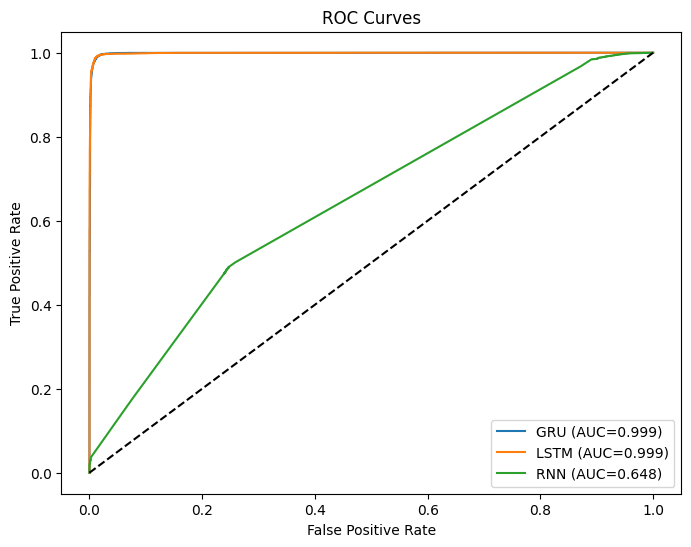

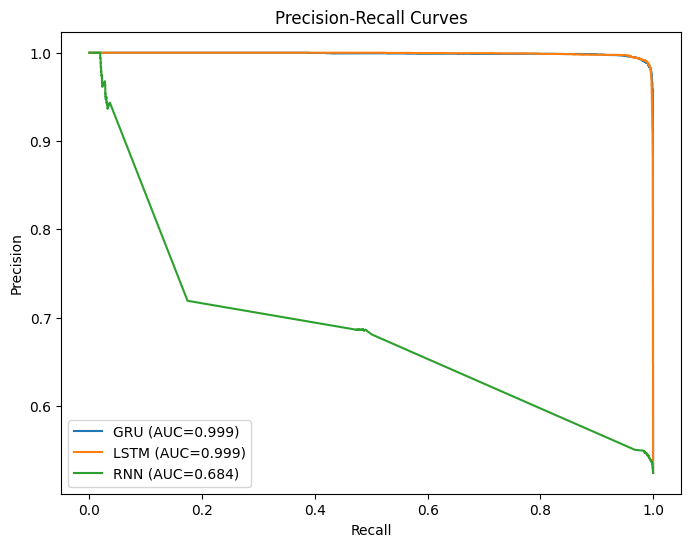

In [37]:
import numpy as np
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    auc
)
import matplotlib.pyplot as plt

# -----------------------
# Best thresholds found
# -----------------------
best_thresholds = {
    "GRU": np.float32(0.76414174),
    "LSTM": np.float32(0.3130121),
    "RNN": np.float32(0.36876982)
}

# -----------------------
# Predictions with thresholds
# -----------------------
y_pred_gru = (gru_probs >= best_thresholds["GRU"]).astype(int)
y_pred_lstm = (lstm_probs >= best_thresholds["LSTM"]).astype(int)
y_pred_rnn = (rnn_probs >= best_thresholds["RNN"]).astype(int)

models = {
    "GRU": (gru_probs, y_pred_gru),
    "LSTM": (lstm_probs, y_pred_lstm),
    "RNN": (rnn_probs, y_pred_rnn)
}

# -----------------------
# Evaluation
# -----------------------
for name, (probs, preds) in models.items():
    print(f"\n🔎 Model: {name}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("\nClassification Report:\n", classification_report(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, probs))

# -----------------------
# ROC Curves
# -----------------------
plt.figure(figsize=(8,6))
for name, (probs, _) in models.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, probs):.3f})")

plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# -----------------------
# Precision-Recall Curves
# -----------------------
plt.figure(figsize=(8,6))
for name, (probs, _) in models.items():
    precision, recall, _ = precision_recall_curve(y_test, probs)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f"{name} (AUC={pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.show()


Prediction on test data

In [38]:
import numpy as np
from tensorflow.keras.models import load_model

# Load models
gru_model  = load_model("gru_model.keras")
lstm_model = load_model("lstm_model.keras")
rnn_model  = load_model("rnn_model.keras")

# Function for prediction (binary output 0/1)
def predict_labels_rnn(model, X_test, threshold=0.369):
    probs = model.predict(X_test, verbose=0)
    preds = (probs >= threshold).astype(int)
    return preds, probs

# Function for prediction (binary output 0/1)
def predict_labels_lstm(model, X_test, threshold=0.313):
    probs = model.predict(X_test, verbose=0)
    preds = (probs >= threshold).astype(int)
    return preds, probs

# Function for prediction (binary output 0/1)
def predict_labels_gru(model, X_test, threshold=0.764):
    probs = model.predict(X_test, verbose=0)
    preds = (probs >= threshold).astype(int)
    return preds, probs


# Run predictions
gru_preds, gru_probs   = predict_labels_gru(gru_model, X_test)
lstm_preds, lstm_probs = predict_labels_lstm(lstm_model, X_test)
rnn_preds, rnn_probs   = predict_labels_rnn(rnn_model, X_test)

# Example outputs for first 10 test samples
for i in range(10):
    print(f"Sample {i+1}:")
    print(f"  GRU  → Pred: {gru_preds[i][0]}, Prob: {gru_probs[i][0]:.4f}")
    print(f"  LSTM → Pred: {lstm_preds[i][0]}, Prob: {lstm_probs[i][0]:.4f}")
    print(f"  RNN  → Pred: {rnn_preds[i][0]}, Prob: {rnn_probs[i][0]:.4f}")
    print("-"*40)

Sample 1:
  GRU  → Pred: 0, Prob: 0.0005
  LSTM → Pred: 0, Prob: 0.0001
  RNN  → Pred: 0, Prob: 0.3688
----------------------------------------
Sample 2:
  GRU  → Pred: 1, Prob: 0.9987
  LSTM → Pred: 1, Prob: 0.9986
  RNN  → Pred: 0, Prob: 0.3688
----------------------------------------
Sample 3:
  GRU  → Pred: 1, Prob: 0.9996
  LSTM → Pred: 1, Prob: 0.9993
  RNN  → Pred: 1, Prob: 0.7119
----------------------------------------
Sample 4:
  GRU  → Pred: 1, Prob: 0.9999
  LSTM → Pred: 1, Prob: 0.9996
  RNN  → Pred: 0, Prob: 0.3688
----------------------------------------
Sample 5:
  GRU  → Pred: 0, Prob: 0.0001
  LSTM → Pred: 0, Prob: 0.0001
  RNN  → Pred: 1, Prob: 0.7119
----------------------------------------
Sample 6:
  GRU  → Pred: 0, Prob: 0.7128
  LSTM → Pred: 1, Prob: 0.9608
  RNN  → Pred: 1, Prob: 0.7119
----------------------------------------
Sample 7:
  GRU  → Pred: 1, Prob: 0.9996
  LSTM → Pred: 1, Prob: 0.9993
  RNN  → Pred: 0, Prob: 0.3688
---------------------------------

Prediction on raw data

In [42]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Load saved models
gru_model  = load_model("gru_model.keras")
lstm_model = load_model("lstm_model.keras")
rnn_model  = load_model("rnn_model.keras")

# Your tuned thresholds
best_thresholds = {
    "GRU": 0.764,
    "LSTM": 0.313,
    "RNN": 0.369
}

def predict_raw(text, tokenizer, model, max_len, threshold=0.5):
    # Preprocess text (assuming you have a transform_text function)
    cleaned = transform_text(text)

    # Convert to sequence
    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Predict probability
    prob = model.predict(pad, verbose=0)[0][0]

    # Apply threshold
    pred = 1 if prob >= threshold else 0

    return pred, prob


# Example raw inputs
samples = [
    "Limited Time Offer!!! Buy 1 get 3 FREE on all weight-loss supplements.Call now to order: 1800-FAKE-OFFER.",
    "Hi Moiz, just reminding you that our project meeting is scheduled for 3 PM tomorrow in the university lab. Please bring your notes."
]
for text in samples:
    print(f"\n🔎 Text: {text}\n")
    for name, model in [("GRU", gru_model), ("LSTM", lstm_model), ("RNN", rnn_model)]:
        pred, prob = predict_raw(
            text, tokenizer, model, max_len, threshold=best_thresholds[name]
        )
        label = "Ham (1)" if pred == 1 else "Spam (0)"
        print(f"{name} → Pred: {label}, Prob: {prob:.4f}")



🔎 Text: Limited Time Offer!!! Buy 1 get 3 FREE on all weight-loss supplements.Call now to order: 1800-FAKE-OFFER.

GRU → Pred: Spam (0), Prob: 0.0645
LSTM → Pred: Spam (0), Prob: 0.1623
RNN → Pred: Spam (0), Prob: 0.3688

🔎 Text: Hi Moiz, just reminding you that our project meeting is scheduled for 3 PM tomorrow in the university lab. Please bring your notes.

GRU → Pred: Ham (1), Prob: 0.9968
LSTM → Pred: Ham (1), Prob: 0.9871
RNN → Pred: Ham (1), Prob: 0.7119


# ***Pipelines***

In [44]:
joblib.dump(tokenizer, "tokenizer.pkl")


['tokenizer.pkl']

In [46]:
import joblib
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# -----------------------------
# 1. Best Thresholds (from tuning)
# -----------------------------
BEST_THRESHOLDS = {
    "GRU": 0.76414174,
    "LSTM": 0.3130121,
    "RNN": 0.36876982
}

# -----------------------------
# 2. Load Pre-trained Models
# -----------------------------
models = {
    "GRU": load_model("gru_model.keras"),
    "LSTM": load_model("lstm_model.keras"),
    "RNN": load_model("rnn_model.keras")
}

# -----------------------------
# 3. Load Tokenizer (saved earlier)
# -----------------------------
tokenizer = joblib.load("tokenizer.pkl")   # must save this after training
max_len = 400  # same as training

# -----------------------------
# 4. Text Preprocessing
# -----------------------------
import nltk, string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download("stopwords")
nltk.download("punkt_tab")

ps = PorterStemmer()
stop_words = set(stopwords.words("english"))

def transform_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalnum()]
    tokens = [t for t in tokens if t not in stop_words and t not in string.punctuation]
    tokens = [ps.stem(t) for t in tokens]
    return " ".join(tokens)

# -----------------------------
# 5. Prediction Function
# -----------------------------
def predict_raw_auto(text, model_name):
    """
    Predicts spam/ham automatically using correct model & threshold.
    Returns: (label, probability, threshold)
    """
    model = models[model_name]
    threshold = BEST_THRESHOLDS[model_name]

    # Preprocess text
    cleaned = transform_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    pad = pad_sequences(seq, maxlen=max_len, padding="post", truncating="post")

    # Predict
    prob = model.predict(pad, verbose=0)[0][0]
    pred = 1 if prob >= threshold else 0

    return pred, prob, threshold

# -----------------------------
# 6. Example Usage
# -----------------------------
if __name__ == "__main__":
    text = "Limited Time Offer!!! Buy 1 get 3 FREE on all weight-loss supplements.Call now to order: 1800-FAKE-OFFER."

    for model_name in ["GRU", "LSTM", "RNN"]:
        pred, prob, th = predict_raw_auto(text, model_name)
        print(f"{model_name} → Pred: {'Ham (1)' if pred==1 else 'Spam (0)'} "
              f"(Prob={prob:.4f}, Threshold={th:.3f})")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


GRU → Pred: Spam (0) (Prob=0.0645, Threshold=0.764)
LSTM → Pred: Spam (0) (Prob=0.1623, Threshold=0.313)
RNN → Pred: Ham (1) (Prob=0.3688, Threshold=0.369)
